import sys
print(sys.path)

In [11]:
# pip install mysql-connector-python, en el NIVEL1 he creado DF y he hecho con consultas SQL. Nivel 2 he modificado codigo y he creado un DF para cada tabla.
import mysql.connector
conexio=mysql.connector.connect(
    host='localhost',
    database='sales',
    user='root',
    password='1234'
)
conexio.is_connected()




import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np







## Exercici 1
Una variable numèrica.

C:\Users\usuario\AppData\Local\Temp\ipykernel_12268\1111420932.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(consulta,conexio)


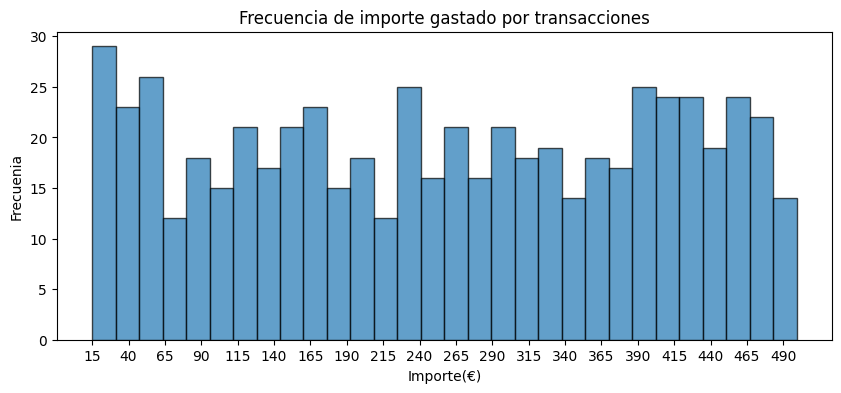

In [19]:


# Realizar una consulta SQL para obtener los datos

consulta = "SELECT amount FROM transactions2 "
df = pd.read_sql_query(consulta,conexio)

plt.figure(figsize=(10, 4))

# Crear el histograma
plt.hist(df['amount'], bins=30, edgecolor='k', alpha=0.7)

# Personalizar el gráfico

plt.title('Frecuencia de importe gastado por transacciones')
plt.xlabel("Importe(€)")
plt.ylabel('Frecuenia')
plt.xticks(np.arange(min(df['amount']), max(df['amount'])+1,25))

# Mostrar el gráfico
plt.show()






Interpretación: Indica la frecuncia de la cantidad de  transacciones segun la cantidad de dinero gastado(Importe). 
Los valores son la cantidad monteria (Importe),y frecuencia cuantas transacciones hay de ese importe.
En este histograma podemos ver que que el rango de la cantidad de gasto(Importe), va desde 15 € a unos 500€. 
Podemos observar que no hay transacciones de menos de 15 €, pero sin embargo hay bastantes ( unas 30 transacciones) que van desde 15€ a 35 € aprox.
El importe menos gastado son 65€-70€, con unas 12 transacciones.





## Exercici 2
Dues variables numèriques.

                                       id   card_id bussines_id  \
0    02C6201E-D90A-1859-B4EE-88D2986D3B02  CcU-2938      b-2362   
1    0466A42E-47CF-8D24-FD01-C0B689713128  CcU-4219      b-2302   
2    063FBA79-99EC-66FB-29F7-25726D1764A5  CcU-2987      b-2250   
3    0668296C-CDB9-A883-76BC-2E4C44F8C8AE  CcU-3743      b-2618   
4    06CD9AA5-9B42-D684-DDDD-A5E394FEBA99  CcU-2959      b-2346   
..                                    ...       ...         ...   
582  FD2E8957-414B-BEEC-E9AD-59AA7A8A6290  CcU-3232      b-2390   
583  FD89D51B-AE8D-77DC-E450-B8083FBD3187  CcU-3960      b-2494   
584  FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65  CcU-4331      b-2302   
585  FE809ED4-2DB6-55AC-C915-929516E4646B  CcU-4849      b-2302   
586  FE96CE47-BD59-381C-4E18-E3CA3D44E8FF  CcU-2945      b-2226   

             fecha_hora  amount  declined  user_id        latitude  \
0   2021-08-28 23:42:24  466.92         0       92   81.9184589824   
1   2021-07-26 07:29:18   49.53         0      170  -43

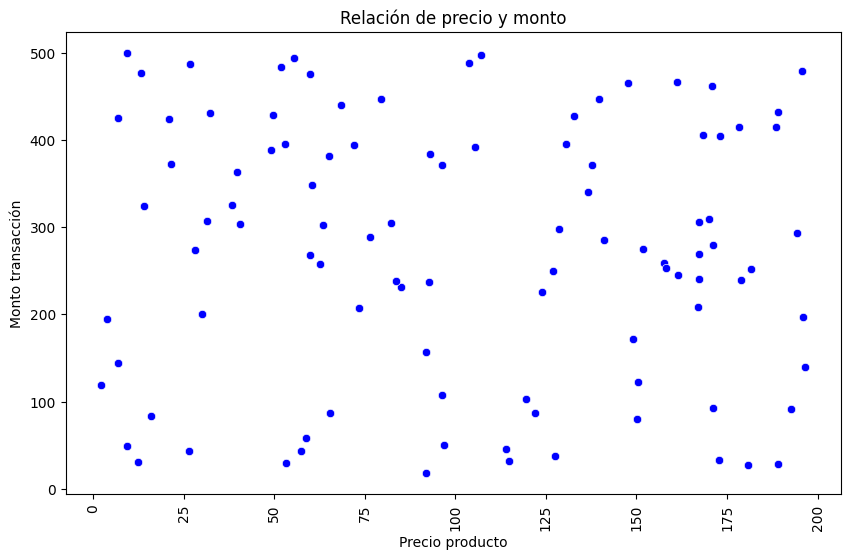

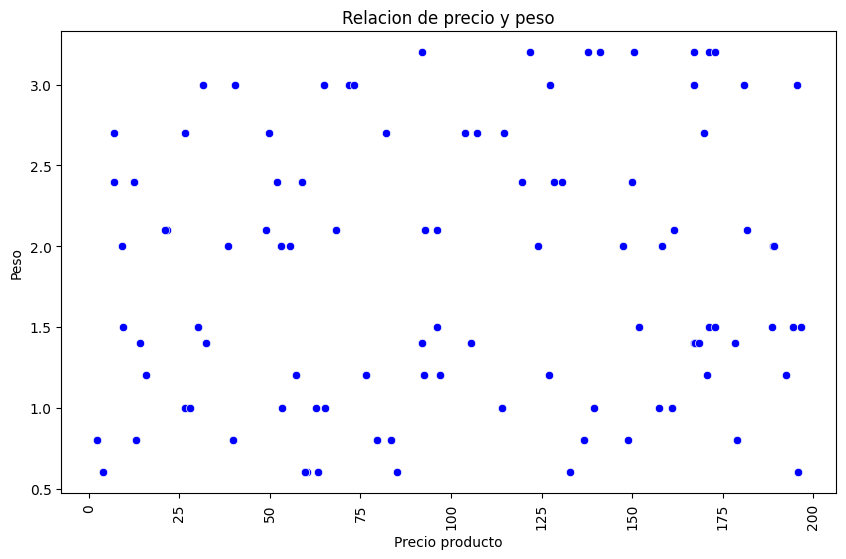

In [20]:
c = conexio.cursor()

c.execute(" SELECT * FROM transactions2")

df_transactions2 = pd.DataFrame(c.fetchall(), columns=[ "id", "card_id","bussines_id","fecha_hora","amount","declined","user_id","latitude","longitude","product1","product2","product3","product4"])

print(df_transactions2)


c.execute(" SELECT * FROM products")

df_products = pd.DataFrame(c.fetchall(), columns=[ "id", "product_name","price","colour","weight","warehouse_id",])

#convertir en numero la variable price:

df_products['price'] = df_products['price'].replace({'\$': ''}, regex=True).astype(float)

print(df_products)

concatenated_df_products_transactions2= pd.concat([df_transactions2,df_products])

##INTERPRETACIÓN 1:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='amount', data=concatenated_df_products_transactions2, color='blue')

# Añadir títulos y etiquetas
plt.title('Relación de precio e importe')
plt.xlabel('Precio producto')
plt.ylabel('Importe transacción')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

##INTERPRETACIÓN 2:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='weight', data=df_products, color='blue')

# Añadir títulos y etiquetas
plt.title('Relacion de precio y peso')
plt.xlabel('Precio producto')
plt.ylabel('Peso')
plt.xticks(rotation=90)
# Mostrar el gráfico
plt.show()






He realizado dos graficos ( scatterplot ), por que no tienen mucha relación , ni sentido las conclusiones que he sacado.Esto se debe a los tipos de datos que estamos trabajando. He realizado uno relacionando amount de la transaccion y precio del producto, y otro relacionando peso y precio de los productos. 

#Interpretación 1:El tipo de grafico es un scatterplot, se utiliza para para averiguar la intensidad de la relación entre dos variables numéricas, en este caso el grafico que se muestra no tiene sentido ya que las dos variables numericas no tienen una relacion directa.
muestra la relacion entre el importe de la transaccion y el precio del producto, tiene relacion pero no es representativo por que en la misma transaccion se pueden comprar mas productos, por lo tanto el precio del producto no tiene relacion directa con el amount de la transaccion.Nunca sera menos pero si que podria ser mas.


#Interpretación 2:En este caso el grafico que se muestra no tiene sentido ya que las dos variables numericas no tienen una relacion directa.
muestra el peso segun el precio, por ejemplo pesa 2kg y cuesta 9.24€.Podemos concluir que no tiene relacion, que no por que pese mas sera mas caro, o por que pese menos será mas barato.




## Exercici 3
Una variable categòrica.



C:\Users\usuario\AppData\Local\Temp\ipykernel_12268\3237429507.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(consulta, conexio)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Belgium'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'China'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'Ireland'),
  Text(7, 0, 'Italy'),
  Text(8, 0, 'Netherlands'),
  Text(9, 0, 'New Zealand'),
  Text(10, 0, 'Norway'),
  Text(11, 0, 'Spain'),
  Text(12, 0, 'Sweden'),
  Text(13, 0, 'United Kingdom'),
  Text(14, 0, 'United States')])

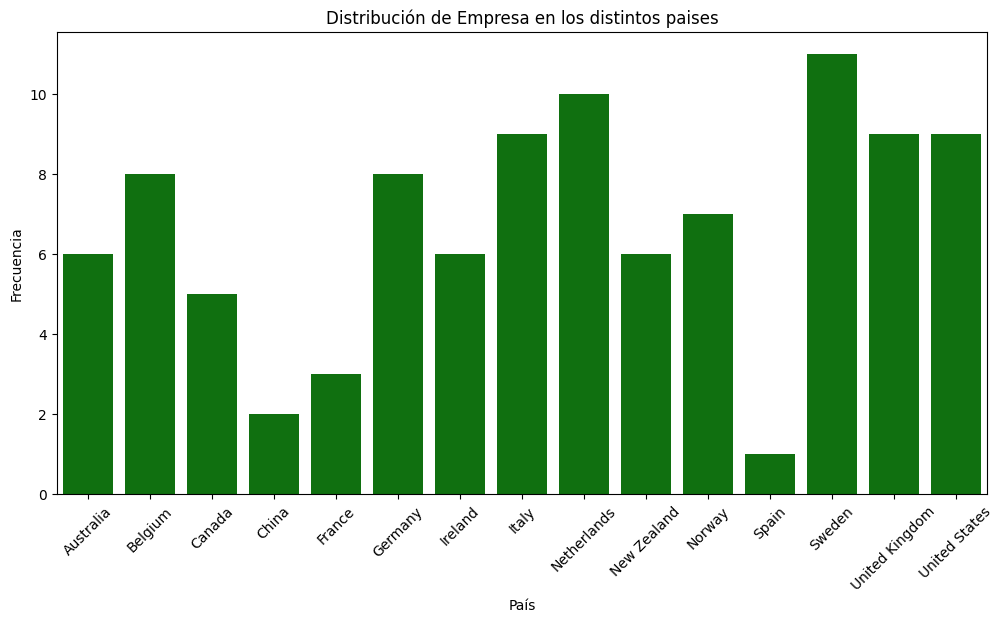

In [23]:
consulta = "SELECT country, COUNT(*) as count FROM companies GROUP BY country;"

df = pd.read_sql_query(consulta, conexio)

# Crear el barplot: muestra la relacion entre el numero de empresas y los paises (categorico).Crear el barplot con seaborn y ajustar el espacio entre columnas


plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='country', y='count', color='green')

plt.title('Distribución de Empresa en los distintos paises')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)



#INTERPRETACIÓN: En este caso hacemos servir un grafico de barras, para representar gráficamente un conjunto de valores mediante barras rectangulares de longitud proporcional a los valores. Los  valores son las 
En este caso grafico podemos ver la cantidad de empresas que hay en cada pais. Por ejemplo podemos ver que en Belgica hay 8 empresas.
Por otro lado como datos relevantes podemos ver que en China y España es donde hay menos empresas. El orden de los 3 paises con menos empresas , seria: España, China y Francia. Los paises con mas empresas serian Suecia, Estados Unidos y Reino Unido. 
Esto significa que tendrian que invertir en expandir el numero de empresas en España , China y Francia parap oder obtener mas beneficios de estos paises que no estan siendo explotados. 


## Exercici 4
Una variable categòrica i una numèrica.

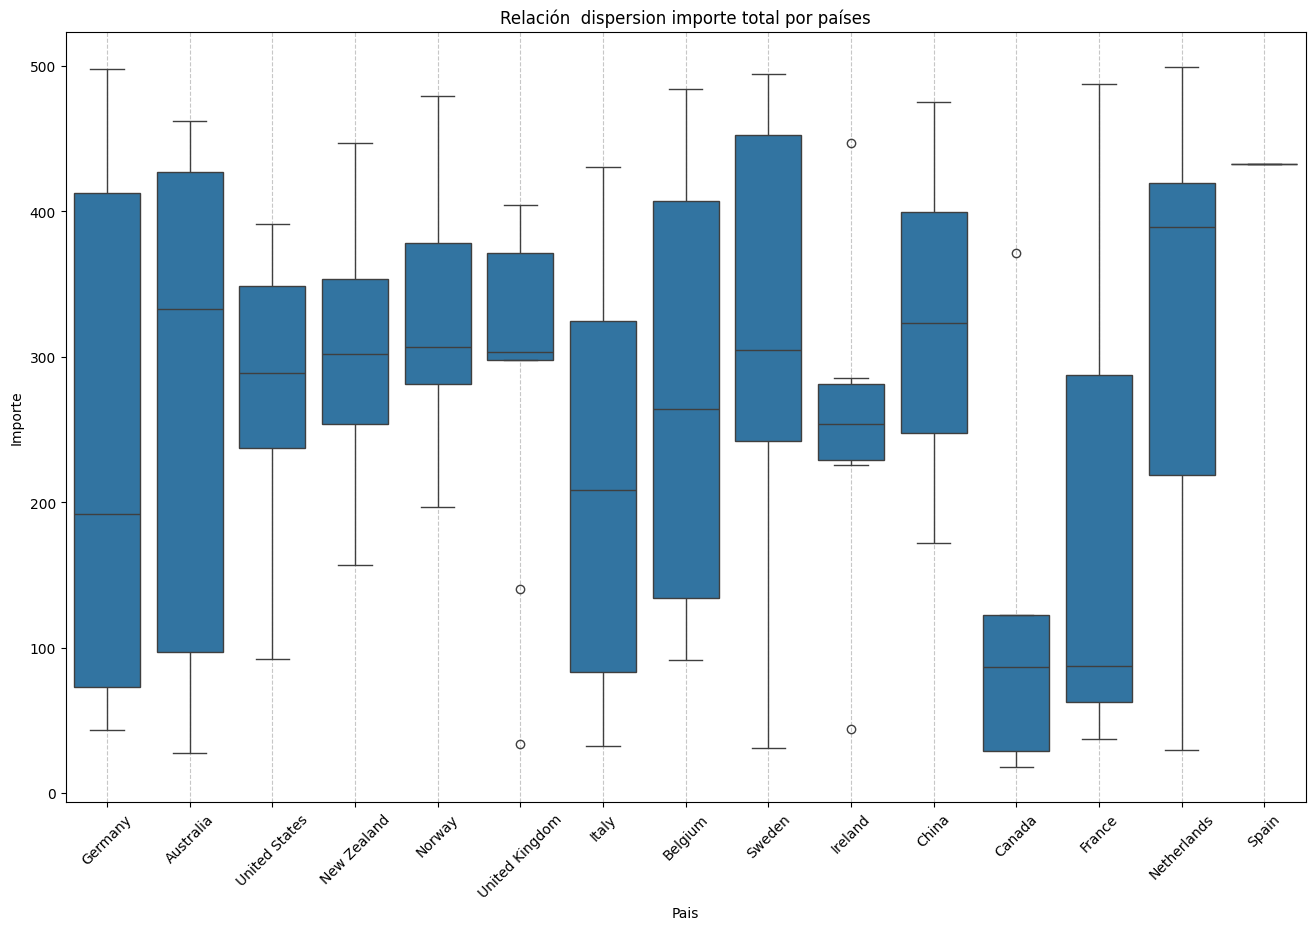

In [24]:
c = conexio.cursor()

c.execute(" SELECT * FROM companies")

df_companies = pd.DataFrame(c.fetchall(), columns=[ "company_id", "company_name","phone","email","country","website",])

#convertir en numero la variable price:


plt.figure(figsize=(16, 10))
sns.boxplot( x=df_companies["country"], y=df_transactions2["amount"] )


plt.xlabel('Pais')
plt.ylabel('Importe')
plt.title('Relación  dispersion importe transacciones por países')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()



#INTERPRETACIÓN:

 Es un gráfico de Boxplot. El exe X representa los paises y el eje Y representa el amount . La dispersión, los valores atípicos y las medianas permiten comprender mejor las diferencias entre países.

La mediana es la linea que hay dentro de la caja,en este grafico podemos ver que Australia tiene una mediana mas alta que Alemania, una cantidad mas alta de 300€.
El tamaño de la caja representa la variabilidad y la dispersion de datos, por ejemplo Alemania tiene mayor dispersion de datos que Irlanda, tiene mas cantidades de amount distintas en las transacciones realizadas en Alemania.
Los puntos fuera de la caja son puntos atipicos , los pises con valores atipicos son: UK, Irlanda y Canada.
Tambien podemos observar como España tiene muy pocas transacciones, por eso es tan pequeña la "caja", de un importe de unos 400€. 

Para concluir los graficos con mayor dispersion en el importe de las transacciones son Alemania y Australia,los que tienen una dispersion menos son España e Irlanda.
La mediana mas alta es: Paises Bajos y la mediana mas baja son : Canada y Francia. 
Con esta conlusión sabremos que paises tenemos que intentar trabajar para subir el gasto por transacciones, y poder obtener mas beneficio por transacción. 




## Exercici 5
Dues variables categòriques.



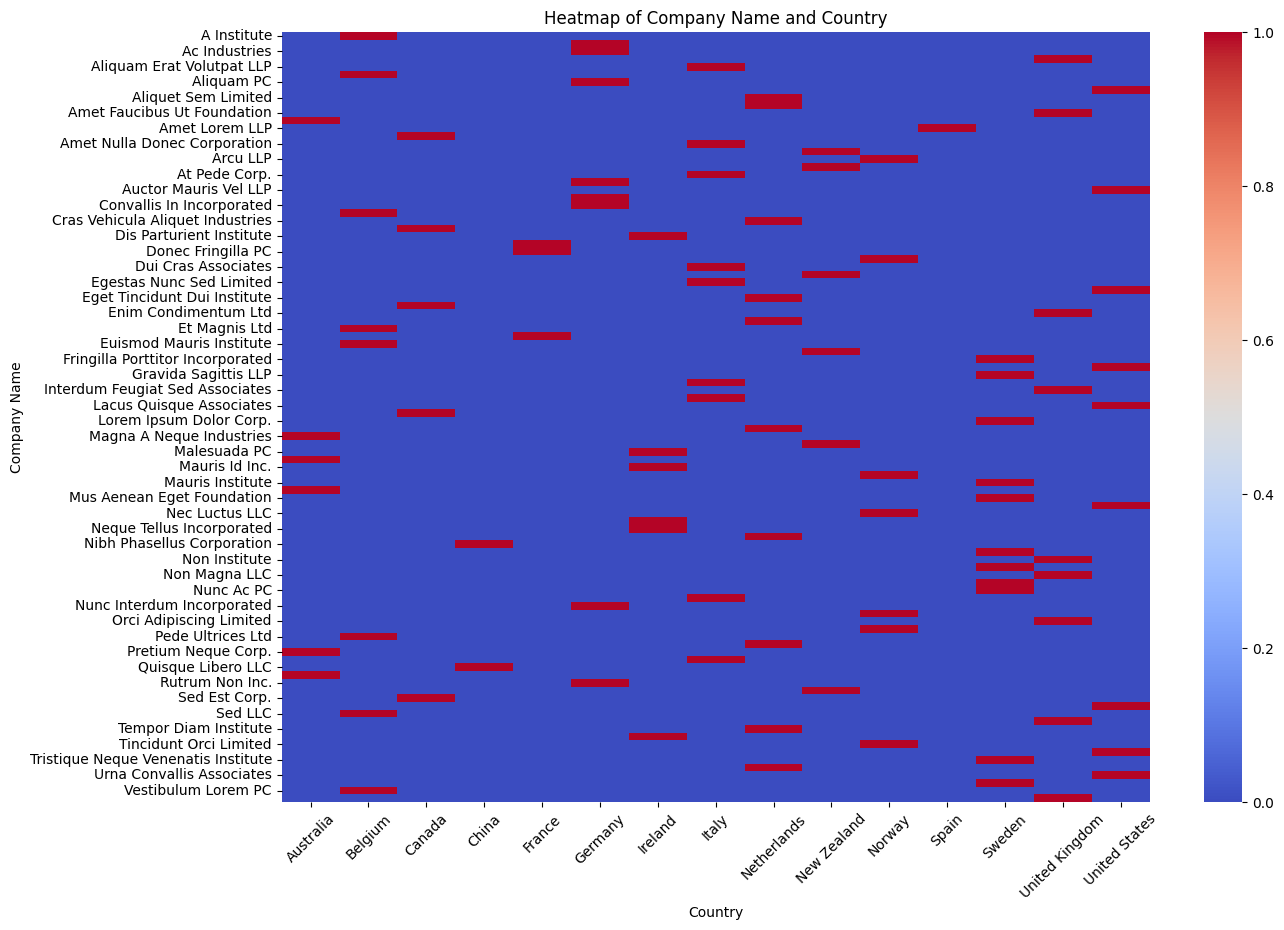

In [205]:


c = conexio.cursor()

c.execute("SELECT * FROM companies")

df_companies = pd.DataFrame(c.fetchall(), columns=[ "company_id","company_name","phone","email","country","website"])

contingency_table = pd.crosstab(df_companies["company_name"], df_companies["country"])

#Tabla de contingencia:Una tabla de contingencia, también conocida como tabla cruzada (crosstab), es una herramienta utilizada en estadística 
#para resumir y analizar la relación entre dos o más variables categóricas. Es una matriz que muestra la frecuencia (número de veces)
#con la que se presentan las combinaciones de diferentes niveles (categorías) de las variables involucradas.

# Crear el heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(contingency_table, cmap='coolwarm')
#cmap='coolwarm': Este parámetro especifica el mapa de colores que se utilizará para representar los valores en el mapa de calor.
plt.xlabel('Country')
plt.ylabel('Company Name')
plt.title('Heatmap of Company Name and Country')
plt.xticks(rotation=45)
plt.show()





**He realizado dos Heatsmaps, corregir el segundo- ciudad-países:

INTERPRETACIÓN: Heatmap (mapa de calor) , podemos ver de color rojo las empresas que se encuentran en los ditintos paises.
Por ejemplo podemos ver como en Swedeen hay 11 empresas y en China solo 2 empresas. Nos permite de forma miu visual cuales son los paises que tienen mas empresas.



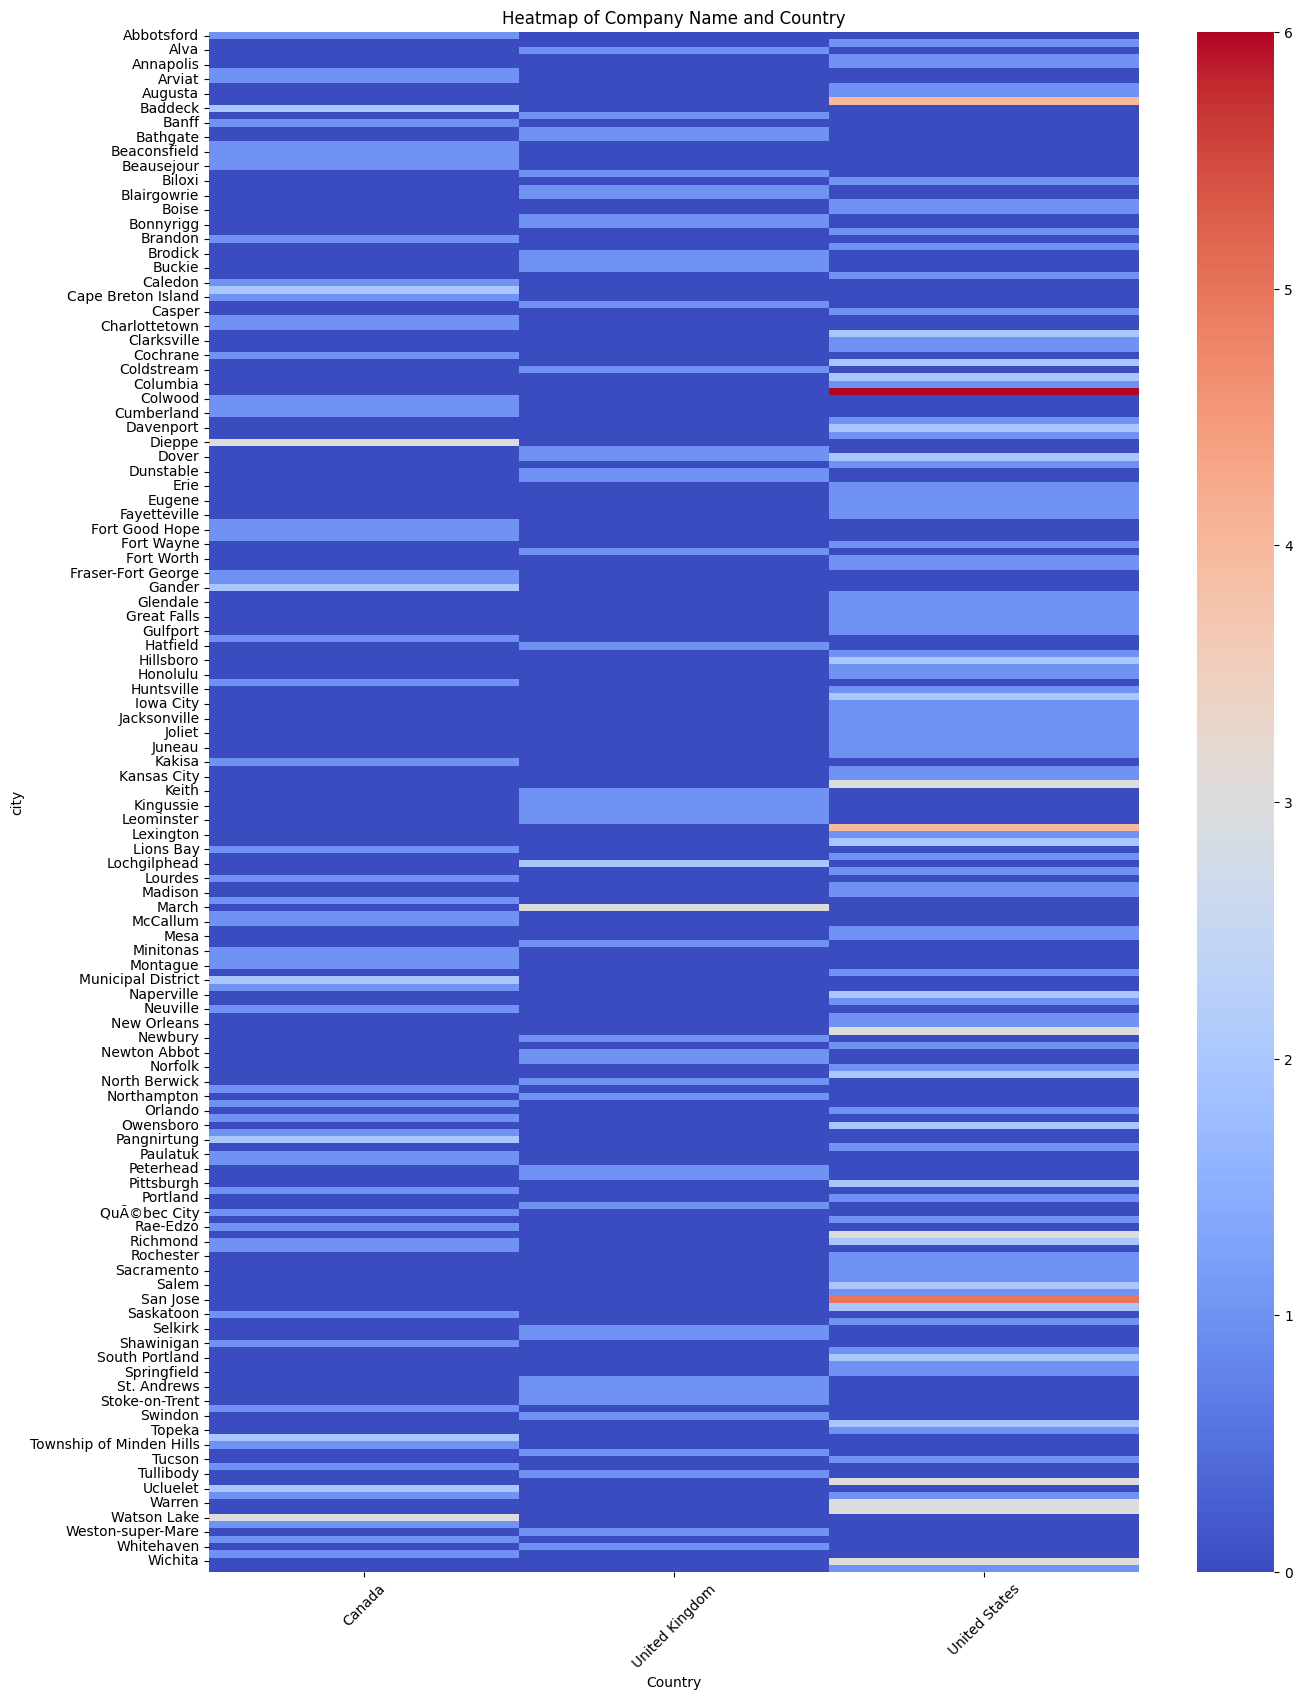

In [35]:
c = conexio.cursor()

c.execute("SELECT * FROM users_all")

df_userall = pd.DataFrame(c.fetchall(), columns=[ "id","name","surname","phone","email","birth_date","country","city","postal_code","adress"])


contingency_table = pd.crosstab(df_userall["city"], df_userall["country"])

plt.figure(figsize=(15, 20))
sns.heatmap(contingency_table, cmap='coolwarm')
#cmap='coolwarm': Este parámetro especifica el mapa de colores que se utilizará para representar los valores en el mapa de calor.
plt.xlabel('Country')
plt.ylabel("city")
plt.title('Cantidad de usuarios en cada ciudad/país')
plt.xticks(rotation=45)
plt.show()



Interpretación:
En este mapa de calor podemos observar los paises y las ciudades donde hay usuarios del las empresas. 
Podemos observar en diferentes colores las ciudades donde podemos observar que hay mas usuarios en funcion de los colores. 
Por ejemplo en rojo podemos ver que en Columbia(USA) hay mas de 5, hay seis usuarios, por eso podemos ver que es de color rojo.
Watson Lake (Canada) tiene 3 usuarios.
Como conclusión podemos observar que en USA hay ciudades con mas densidad de usuarios, y UK tiene menos densidad de usuarios.




 ## Exercici 6
Tres variables.

C:\Users\usuario\AppData\Local\Temp\ipykernel_20908\4273929332.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(consulta, conexio)


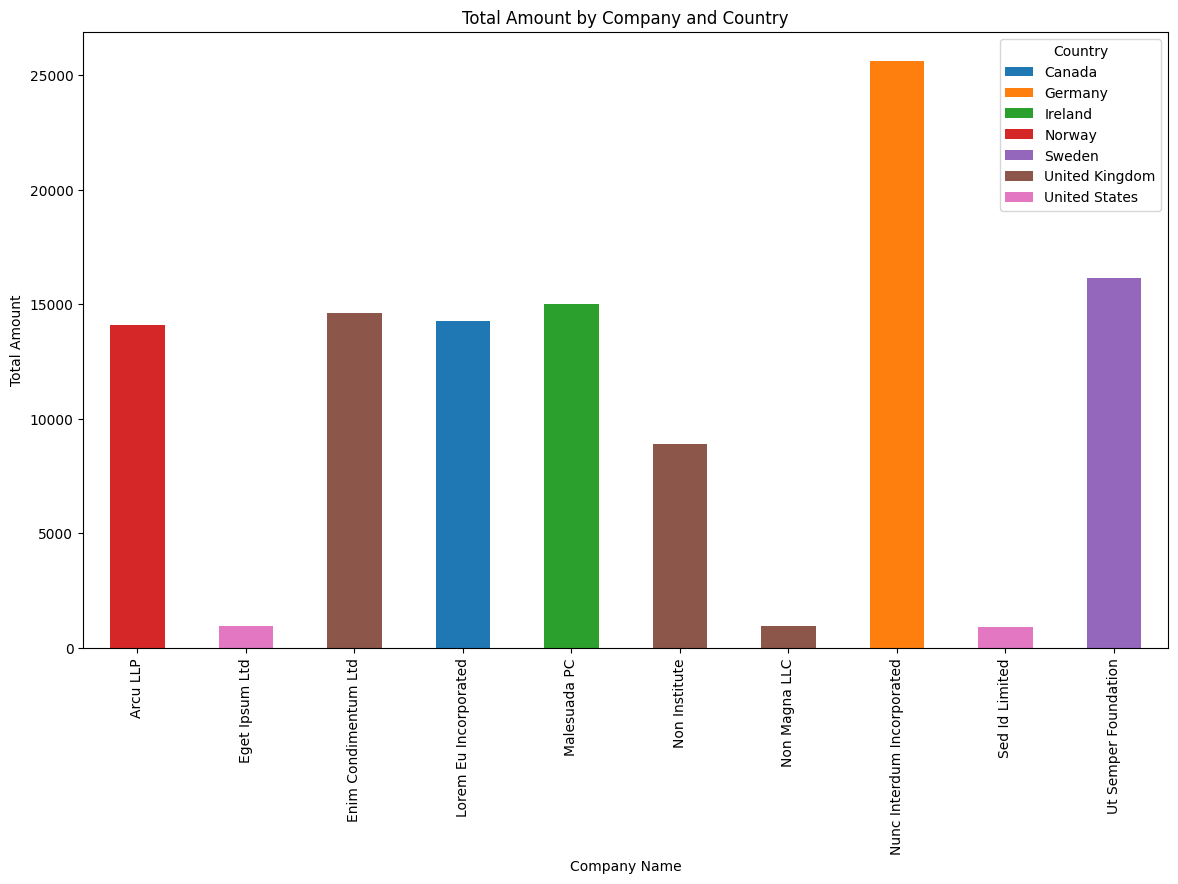

In [160]:

consulta= '''select company_name, country, sum(amount) 
from companies 
inner join transactions2 on company_id = bussines_id 
group by company_name, country
order by sum(amount) DESC
limit 10; 
'''

df = pd.read_sql_query(consulta, conexio)

# Pivotar el DataFrame para obtener un formato adecuado para un gráfico de barras apiladas/ metodo de libreria pandas 
new_df = df.pivot(index='company_name', columns='country', values='sum(amount)').fillna(0)

# Crear el gráfico de barras apiladas
new_df.plot(kind='bar', stacked=True, figsize=(14, 8))


plt.xlabel('País')
plt.ylabel('Total suma importe')
plt.title('TOP 10 cantidad de importe por empresa/país')
plt.xticks(rotation=90) #rotar nombres company
plt.legend(title='Country')


plt.show()



INTERPRETACIÓN:

En este grafico de barras podemos observar los siguientes: Valores: Index: Company name, Columns: Country y values: sum(amount). Podemos observar el total de amount de cada empresa segun paises.
Podemos observar que las TOP 10 empresas que han tenido una suma del importe mas elevado, la primera con la suma mas alta ha sido: Nunc Interdum Incorporated situada en Alemania, con una suma que alcanza casi los 15000 € de importe. 
Las empresas que ha tenido un importe mas bajo es: Eget Ipsum Ltd Sed id Limited de Estados Unidos con importes qu eno alcanzan los 5000 €, y Non Magna LLC de UK que no alcanza tampoco los 5000 €.

 ## Exercici 7
Graficar un Pairplot.



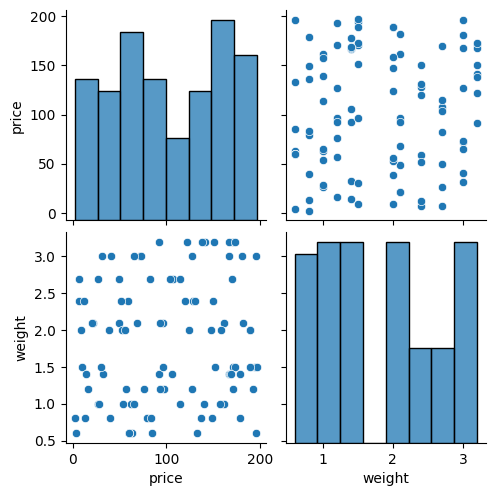

In [39]:




selected_columns= ["price","weight"]
df_selected = df_products[selected_columns]



sns.pairplot(df_selected)





INTERPRETACIÓN1: Este Pairplot representa la relación entre precio y peso, dos variables numericas. 

Histograma de precio:Muestra como los valores precio se distribuyen en diferentes rangos. Parece una distribución bastante uniforme.
Histograma de peso:Muestra como los valores de peso se distribuyen en diferentes rangos tambien.No es una distribución tan uniforme, vemos que hay pesos que aparecen con mas frecuencia. Podemos observar tambien que no hay ningún peso entre 1.5 a 2 kg, por eso hay una barra en blanco.

Grafico dispersión:precio eje Y, peso eje X.Podemos ver como se distribuyen los valores de precio en funcion del peso.No parece haber una relación clara y directa entre precio y peso, ya que los puntos están dispersos sin formar un patrón obvio.

**En este caso podria agrupar por el color por ejemplo pero al haber tantos colores distintos no es muy claro, asi que no lo he agrupado por ningun valor categorico pero la forma seria:

selected_columns= ["price","weight","colour"]
df_selected = df_products[selected_columns,hue="colour"]

sns.pairplot(df_selected)
